In [137]:
from random import uniform, randint
import math

class Polynomial():
    """
    Cada polinomio de grado n se representa con una n-upla con los coeficientes
    ordenados por los exponentes desde el mayor hasta 0.
    """
    def __init__(self, coefficients:list):
        self.coefficients = coefficients
        self.degree = len(coefficients) - 1

    def __str__(self):
        """
        Imprime el polinomio
        """
        s = ""
        for i in range(self.degree):
            if self.coefficients[i] < 0:
                s += "{}x^{} ".format(str(self.coefficients[i]), self.degree - i)
            else:
                s += "+{}x^{} ".format(str(self.coefficients[i]), self.degree - i)
        if self.coefficients[-1] < 0:
            return s + str(self.coefficients[-1])
        return s + "+" + str(self.coefficients[-1])
    
    def  __mul__(self, other):
        """
        Método para tests. Multiplica dos polinomios.
        """
        prod_polynomial = [0]*(self.degree+other.degree+1)
        for i in range(self.degree + 1):
            for j in range(other.degree + 1):
                prod_polynomial[i + j] += self.coefficients[i] * other.coefficients[j]
        return Polynomial(tuple(prod_polynomial))


    def approx_root_recursive(self, min_val, max_val, max_error=0.0001):
        """
        Recibe dos puntos para el que el polinomio toma un valor positivo
        y uno negativo y aproxima una de sus raíces usando el Método de Bolzano.
        """
        mean = (min_val + max_val)/2                                                  # O(1)
        approx_root = self.f(mean)                                                    # O(n), siendo n el grado del polinomio.
        if max_error >= abs(approx_root):                                             # O(1)
            return mean                                                               # O(1)
        elif 0 < approx_root:                                                         # O(1)
            if self.f(min_val) < 0:                                                   # O(1)
                return self.approx_root_recursive(min_val, mean, max_error)           # O(log_2(m)), siendo m la longitud del intervalo de busqueda.
            else:                                                                     # O(1)
                return self.approx_root_recursive(mean, max_val, max_error)           # O(log_2(m))
        else:                                                                         # O(1)
            if self.f(max_val) < 0:                                                   # O(1)
                return self.approx_root_recursive(min_val, mean, max_error)           # O(log_2(m))
            else:                                                                     # O(1)
                return self.approx_root_recursive(mean, max_val, max_error)           # O(log_2(m))
    
    def approx_root_iterative(self, min_val, max_val, max_error=0.0001):
        """
        Recibe dos puntos para el que el polinomio toma un valor positivo
        y uno negativo y aproxima una de sus raíces usando el Método de Bolzano.
        """
        mean = (min_val + max_val)/2                                                  # O(1)
        pol_in_approx_root = self.f(mean)                                             # O(n)
        prev = None
        while max_error < abs(pol_in_approx_root):                                    # O(log_2(m))
            if 0 < pol_in_approx_root:                                                # O(1)
                if self.f(min_val) < 0:                                               # O(n)
                    max_val = mean                                                    # O(1)
                else:                                                                 # O(1)
                    min_val = mean                                                    # O(1)
            else:                                                                     # O(1)
                if self.f(max_val) < 0:                                               # O(n)
                    max_val = mean                                                    # O(1)
                else:                                                                 # O(1)
                    min_val = mean                                                    # O(1)
            mean = (min_val + max_val)/2                                              # O(1)
            pol_in_approx_root = self.f(mean)                                         # O(n)
            if mean == prev:                                                          # O(n)
                return mean                                                           # O(n)
            else:                                                                     # O(n)
                prev = mean                                                           # O(n)
        return mean                                                                   # O(1)

    def approximate_root(self, a, b, max_error=0.0001, max_attempts=100, recursive=False):
        """
        Busca dos puntos en los que el polinomio tome valores nagativo y positivo, de
        encontrarlos llama al método de aproximacion recursivo: approx_root_recursive.
        Si encuentra un valor para el que el polinomio está suficientemente cerca de 0
        evade el procedimiento descrito arriba y retorna este valor.
        La búsqueda se realiza generando un máximo de 100 (considerando que el problema 
        esta acotado a [0, 1000]) valores aleatorios con distribución uniforme de tipo 
        float en el intervalo (a, b).
        """
        f_of_a = self.f(a)                                                            # O(1)
        f_of_b = self.f(b)                                                            # O(1)
        sign = 1                                                                      # O(1)
        if abs(f_of_a) <= max_error:                                                  # O(1)
            return a                                                                  # O(1)
        elif f_of_a < 0:                                                              # O(1)
            if abs(f_of_b) <= max_error:                                              # O(1)
                return b                                                              # O(1)
            elif f_of_b > 0:                                                          # O(1)
                if recursive:                                                         # O(1)
                    return self.approx_root_recursive(a, b)                           # O(n*log_2(m))
                return self.approx_root_iterative(a, b)                               # O(n*log_2(m))
        else:                                                                         # O(1)
            sign = -1                                                                 # O(1)
            if abs(f_of_b) <= max_error:                                              # O(1)
                return b                                                              # O(1)
            elif f_of_b < 0:                                                          # O(1)
                if recursive:                                                         # O(1)
                    return self.approx_root_recursive(a, b)                           # O(n*log_2(m))
                return self.approx_root_iterative(a, b)                               # O(n*log_2(m))
        for i in range(max_attempts):                                                 # 100*O(1) = O(1) 
            rand = uniform(a, b)                                                      # O(1)
            # https://stackoverflow.com/questions/66669290/what-is-time-complexity-of-generating-number-from-uniformint-x-int-y-function
            if self.f(rand) * sign > 0:                                               # O(1)
                if recursive:                                                         # O(1)
                    return self.approx_root_recursive(a, rand)                        # O(n*log_2(m))
                return self.approx_root_iterative(a, rand)                            # O(n*log_2(m))
        return None                                                                   # O(1)


    def f(self, x):
        """
        Evalua el polinomio en x.
        """
        ret_value = 0                                                                 # O(1)
        for i in range(self.degree + 1):                                              # O(n)
            ret_value += self.coefficients[self.degree - i]*(x**i)                    # O(1)
        return ret_value                                                              # O(1)

# Al fijar el grado del polinomio, la complejidad temporal es de O(log_2(m)).
# Complejidad temporal de aproximar una raíz: O(n*log_2(m))

In [138]:
import time 
print("Problema puntual.")
model_p = Polynomial([-1, 30, 15, 34, 540])                                           # O(1)
print(model_p)

start_time = time.time()

print(model_p.approximate_root(0, 1000))                                              # O(n)

print("El tiempo de ejecución fue:", time.time() - start_time, "ns")

-1x^4 +30x^3 +15x^2 +34x^1 +540
30.546439615136478
El tiempo de ejecución fue: 0.0006086826324462891 ns


In [174]:
import sys
from matplotlib import pyplot as plt
sys.setrecursionlimit(140000)
print("Testing\nRecursion limit:", sys.getrecursionlimit(),"\n")


def generate_p_with_roots(degree, poly_amount=10, root_range=100, print_info=False, search_range_a=0, search_range_b=1000, max_random=100):
    """
    Genera poly_amount polinomios de grado degree con raíces conocidas en el 
    intervalo (-root_range, root_range), esto multiplicando por binomios de grado 1,
    y busca sus raíces.
    Retorna el promedio de los tiempos para los polinomios para los que se encontro'
    una raíz.
    """
    total_time = missing_count = 0
    for j in range(poly_amount):
        root = uniform(-1*root_range, root_range)
        my_pol = Polynomial([1,root])
        if print_info:
            print("Root 1: {}".format(root * -1))
        for i in range(degree-1):
            root = uniform(-1*root_range, root_range)
            my_pol *= Polynomial([1, root])
            if print_info:
                print("Root {}: {}".format(i+2, root * -1))

        if print_info:
            print("Polinomio:", my_pol)

        start_time = time.time()

        my_root = my_pol.approximate_root(a=search_range_a, b=search_range_b, max_attempts=max_random)

        execution_time = time.time() - start_time

        if print_info:
            print("Tiempo de ejecución:", execution_time, "ns.\nRaíz encontrada:", my_root,"\n")
        if my_root != None:
            total_time += execution_time
        else:
            missing_count += 1
    if print_info:
        print("degree:", degree)
    if poly_amount == missing_count:
        total_time = 0
        poly_amount += 1
    return [total_time/(poly_amount - missing_count), (poly_amount - missing_count)/poly_amount]


def generate_rand_p(poly_amount=100, coefficient_range=100, degree=4, print_info=False, search_range_a=0, search_range_b=1000, max_random=100):
    """
    Genera poly_amount polinomios de grado degree con coeficientes enteros en el 
    intervalo (-coefficient_range, coefficient_range).
    Retorna un arreglo con [0] el promedio de los tiempos en los que se encontro' 
    una raíz, y [1] el cociente de raíces encontradas sobre total de polinomios.
    """
    total_time = missing_count = 0
    for i in range(poly_amount):
        my_polynomial = Polynomial([randint(-1*coefficient_range, coefficient_range) for i in range(degree + 1)])
        if print_info:
            print("Polinomio: {}".format(my_polynomial))

        start_time = time.time()

        my_root = my_polynomial.approximate_root(a=search_range_a, b=search_range_b, max_attempts=max_random)

        execution_time = time.time() - start_time

        if print_info:
            print("Tiempo de ejecución:", execution_time, "ns.\nRaíz:", my_root,"\n")

        if my_root != None:
            total_time += execution_time
        else:
            missing_count += 1
    if print_info:
        print("Se encontraron raíces para {} polinomios de grado {}.".format(poly_amount - missing_count, degree))
    if poly_amount == missing_count:
        total_time = 0
        poly_amount += 1
    return [total_time/(poly_amount - missing_count), (poly_amount - missing_count)/poly_amount]

Testing
Recursion limit: 140000 



Testing - Polinomios de raíces conocidas.
Recursion limit: 14000 




Tiempo promedio en encontrar una raíz por grado (100 corridas), rango de bu'squeda []
Rojo: Max. 1000 puntos aleatorios, rango de bu'squeda [0,1000]
Azul: Max. 100 puntos aleatorios, rango de bu'squeda [0,1000]
Verde: Max. 100 puntos aleatorios, rango de bu'squeda [-100,100]
Cian: Max. 1000 puntos aleatorios, rango de bu'squeda [-100,100]


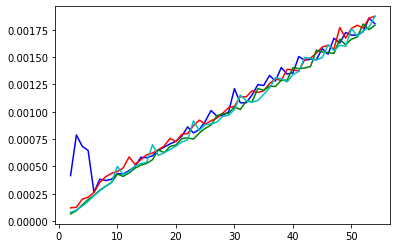

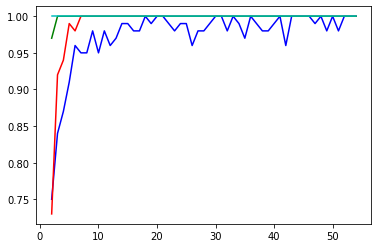

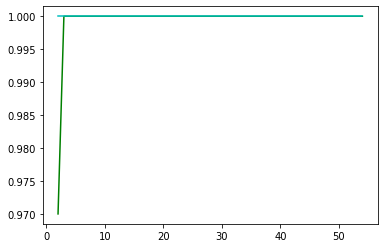

In [188]:
import sys
sys.setrecursionlimit(14000)
print("Testing - Polinomios de raíces conocidas.\nRecursion limit:", sys.getrecursionlimit(),"\n")

indexes = list(range(2,55))

average_times = [generate_p_with_roots(degree=x, 
                                       poly_amount=100, 
                                       root_range=100) for x in indexes]
print("")
average_times2 = [generate_p_with_roots(degree=x, 
                                       poly_amount=100, 
                                       root_range=100,
                                       max_random=1000) for x in indexes]
print("")
average_times3 = [generate_p_with_roots(degree=x, 
                                       poly_amount=100, 
                                       root_range=100,
                                       max_random=100,
                                       search_range_a=-100, 
                                       search_range_b=100) for x in indexes]
print("")
average_times4 = [generate_p_with_roots(degree=x, 
                                       poly_amount=100, 
                                       root_range=100,
                                       max_random=1000,
                                       search_range_a=-100, 
                                       search_range_b=100) for x in indexes]

print("Tiempo promedio en encontrar una raíz por grado (100 corridas), rango de bu'squeda []")
print("Rojo: Max. 1000 puntos aleatorios, rango de bu'squeda [0,1000]")
print("Azul: Max. 100 puntos aleatorios, rango de bu'squeda [0,1000]")
print("Verde: Max. 100 puntos aleatorios, rango de bu'squeda [-100,100]")
print("Cian: Max. 1000 puntos aleatorios, rango de bu'squeda [-100,100]")
plt.plot(indexes, [i[0] for i in average_times], 'b')
plt.plot(indexes, [i[0] for i in average_times2], 'r')
plt.plot(indexes, [i[0] for i in average_times3], 'g')
plt.plot(indexes, [i[0] for i in average_times4], 'c')
plt.show()
plt.plot(indexes, [i[1] for i in average_times], 'b')
plt.plot(indexes, [i[1] for i in average_times2], 'r')
plt.plot(indexes, [i[1] for i in average_times3], 'g')
plt.plot(indexes, [i[1] for i in average_times4], 'c')
plt.show()
plt.plot(indexes, [i[1] for i in average_times3], 'g')
plt.plot(indexes, [i[1] for i in average_times4], 'c')
plt.show()

Testing - Polinomios aleatorios.
Recursion limit: 14000 





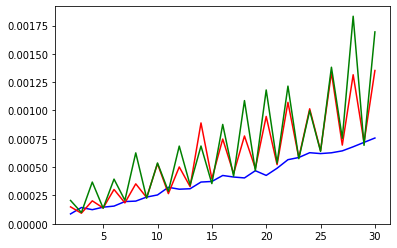

Medida de exito por grados (0 - ninguna raiz, 1 - todas las raices)


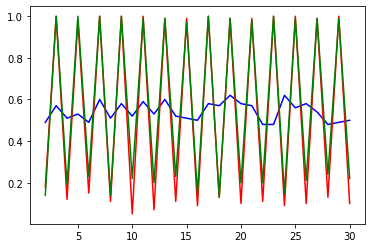

In [155]:
import sys
sys.setrecursionlimit(14000)
print("Testing - Polinomios aleatorios.\nRecursion limit:", sys.getrecursionlimit(),"\n")
indexes = list(range(2,31))

# Azul
# Rango de bu'squeda: [0,1000]
# Max. 100 puntos aleatorios
average_times = [generate_rand_p(poly_amount=100, 
                                 coefficient_range=100, 
                                 degree=x, 
                                 search_range_a=0, 
                                 search_range_b=1000) for x in indexes]
print("")

# Rojo
# Rango de busqueda: [-1000,1000] --> Menor densidad de puntos aleatorios
# Max. 100 puntos aleatorios
average_times2 = [generate_rand_p(poly_amount=100, 
                                  coefficient_range=100, 
                                  degree=x, 
                                  search_range_a=-1000, 
                                  search_range_b=1000) for x in indexes]
print("")

# Verde
# Rango de busqueda: [-1000,1000]
# Max. 200 puntos aleatorios
average_times3 = [generate_rand_p(poly_amount=100, 
                                  coefficient_range=100, 
                                  degree=x, 
                                  search_range_a=-1000, 
                                  search_range_b=1000, 
                                  max_random=200) for x in indexes]

print("Tiempo promedio en encontrar una raíz por grado (100 corridas)")
plt.plot(indexes, [i[0] for i in average_times], 'b')
plt.plot(indexes, [i[0] for i in average_times2], 'r')
plt.plot(indexes, [i[0] for i in average_times3], 'g')
plt.show()
print("Medida de exito por grados (0 - ninguna raíz, 1 - todas las raíces)")
plt.plot(indexes,[i[1] for i in average_times], 'b')
plt.plot(indexes, [i[1] for i in average_times2], 'r')
plt.plot(indexes, [i[1] for i in average_times3], 'g')
plt.show()

Testing - Polinomios aleatorios.
Recursion limit: 14000 





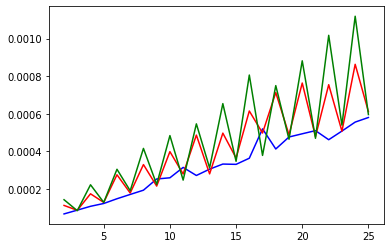

Medida de exito por grados (0 - ninguna raiz, 1 - todas las raices)


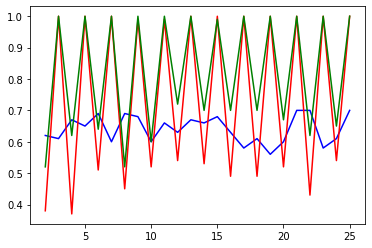

In [154]:
import sys
sys.setrecursionlimit(14000)
print("Testing - Polinomios aleatorios.\nRecursion limit:", sys.getrecursionlimit(),"\n")
indexes = list(range(2,26))

# Azul
# Rango de bu'squeda: [0,100]
# Max. 100 puntos aleatorios
average_times = [generate_rand_p(poly_amount=100, 
                                 coefficient_range=100, 
                                 degree=x, 
                                 search_range_a=0, 
                                 search_range_b=100) for x in indexes]
print("")

# Rojo
# Rango de busqueda: [-100,100]
# Max. 100 puntos aleatorios
average_times2 = [generate_rand_p(poly_amount=100, 
                                  coefficient_range=100, 
                                  degree=x, 
                                  search_range_a=-100, 
                                  search_range_b=100) for x in indexes]
print("")

# Verde
# Rango de busqueda: [-100,100]
# Max. 200 puntos aleatorios
average_times3 = [generate_rand_p(poly_amount=100, 
                                  coefficient_range=100, 
                                  degree=x, 
                                  search_range_a=-100, 
                                  search_range_b=100, 
                                  max_random=200) for x in indexes]

print("Tiempo promedio en encontrar una raíz por grado (100 corridas)")
plt.plot(indexes, [i[0] for i in average_times], 'b')
plt.plot(indexes, [i[0] for i in average_times2], 'r')
plt.plot(indexes, [i[0] for i in average_times3], 'g')
plt.show()
print("Medida de exito por grados (0 - ninguna raíz, 1 - todas las raíces)")
plt.plot(indexes,[i[1] for i in average_times], 'b')
plt.plot(indexes, [i[1] for i in average_times2], 'r')
plt.plot(indexes, [i[1] for i in average_times3], 'g')
plt.show()

Testing - Polinomios aleatorios.
Variacio'n de intervalos de bu'squeda.

----------------- Grado 2 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


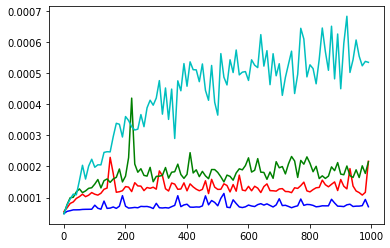

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


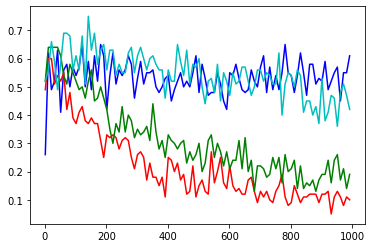

----------------- Grado 3 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


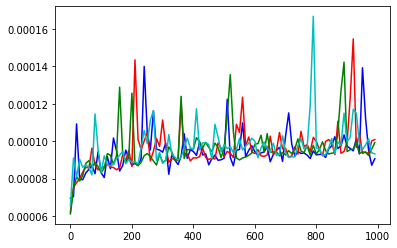

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


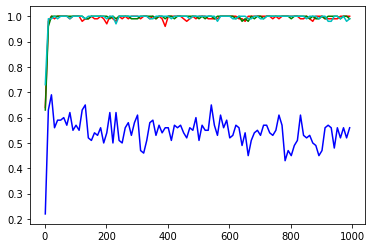

----------------- Grado 4 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


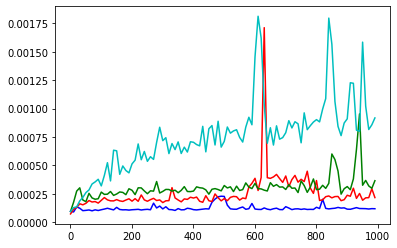

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


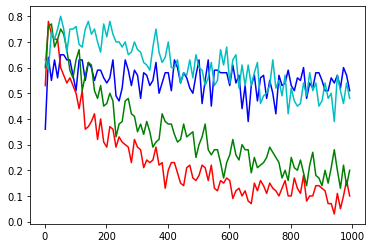

----------------- Grado 5 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


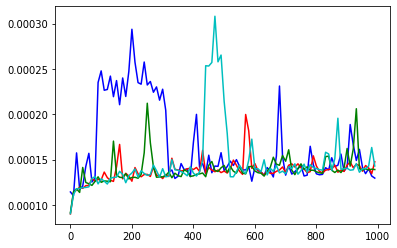

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


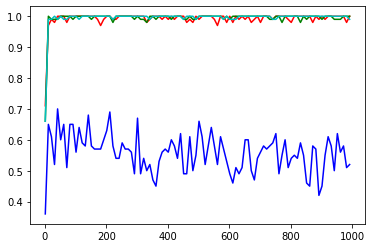

----------------- Grado 6 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


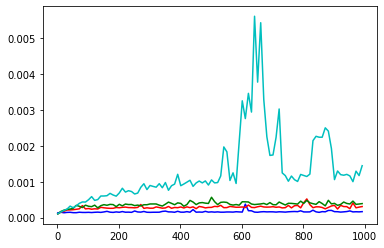

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


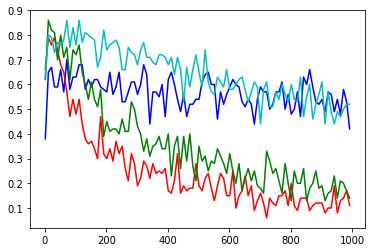

----------------- Grado 7 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


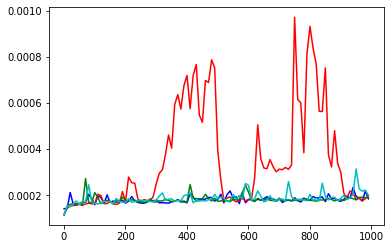

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


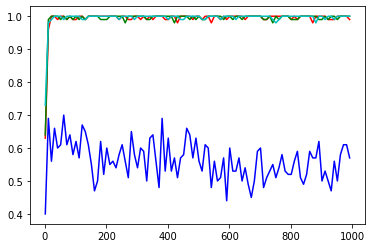

----------------- Grado 8 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


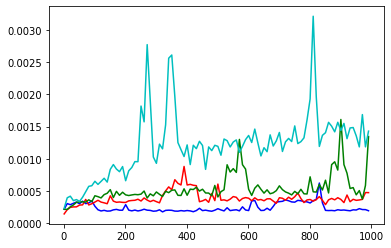

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


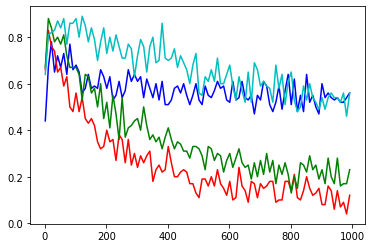

----------------- Grado 9 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


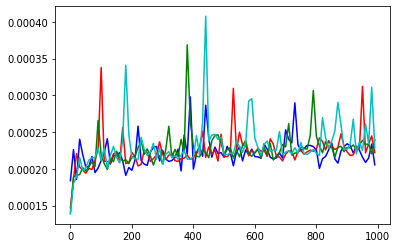

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


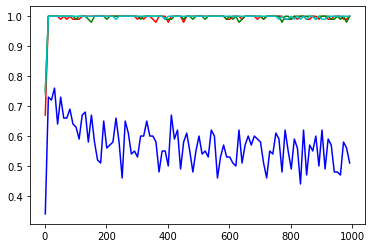

----------------- Grado 10 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


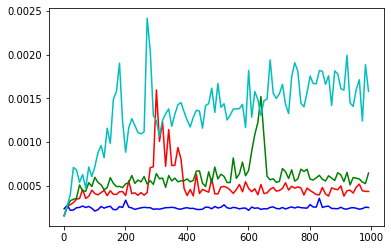

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


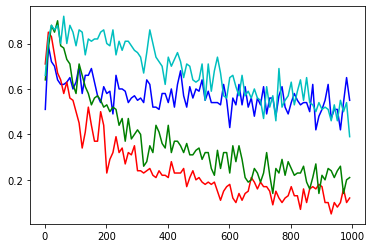

----------------- Grado 11 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


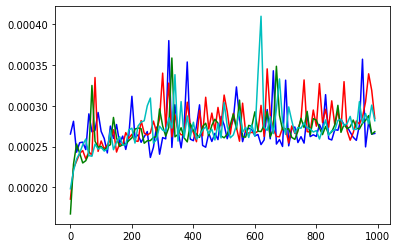

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


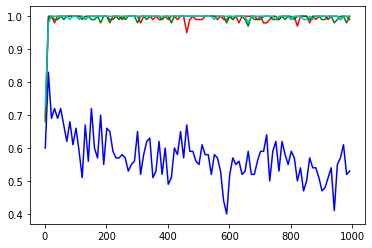

----------------- Grado 12 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


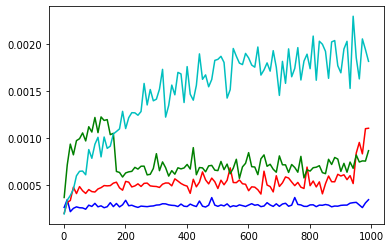

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


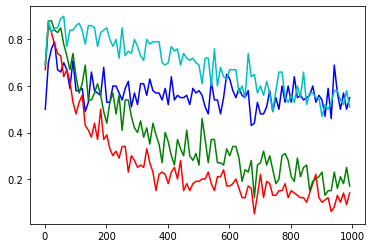

----------------- Grado 13 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


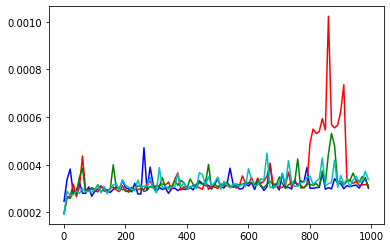

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


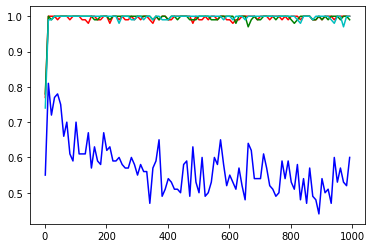

----------------- Grado 14 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


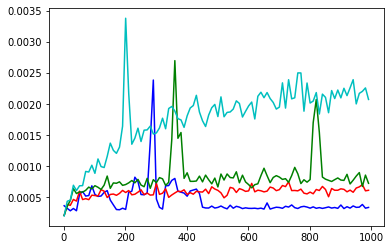

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


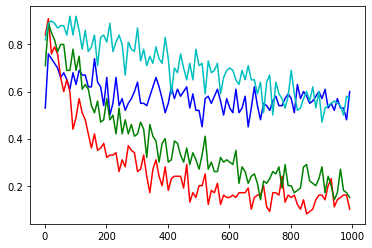

----------------- Grado 15 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


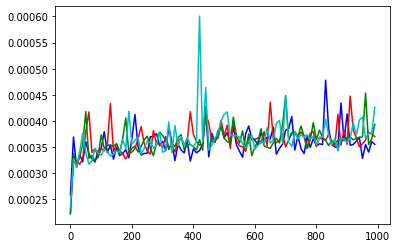

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


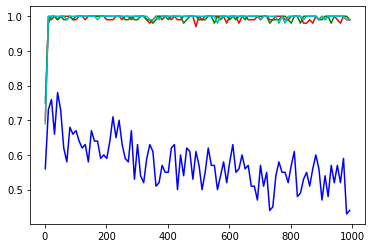

----------------- Grado 16 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


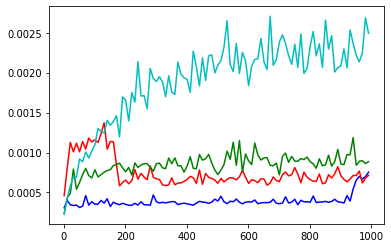

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


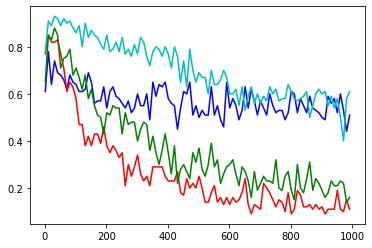

----------------- Grado 17 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


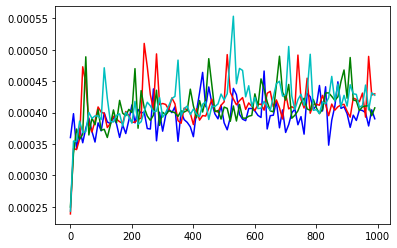

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


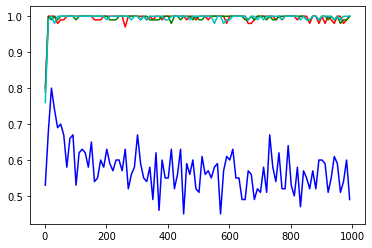

----------------- Grado 18 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


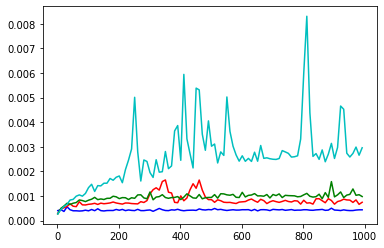

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


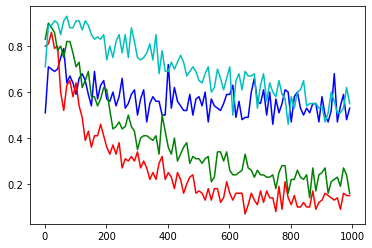

----------------- Grado 19 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


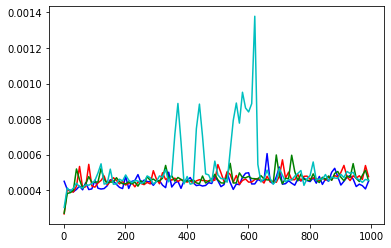

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


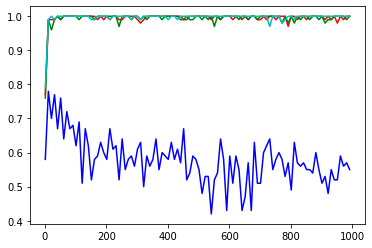

----------------- Grado 20 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


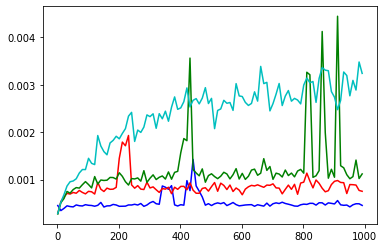

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


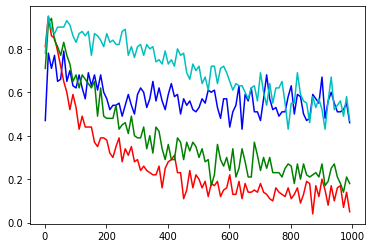

----------------- Grado 21 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


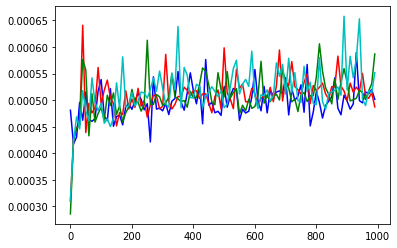

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


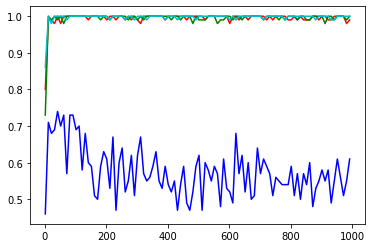

----------------- Grado 22 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


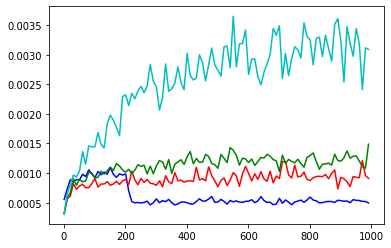

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


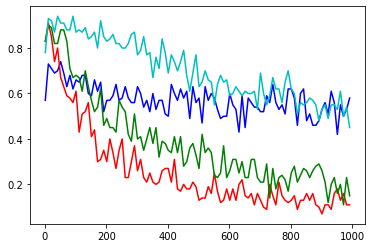

----------------- Grado 23 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


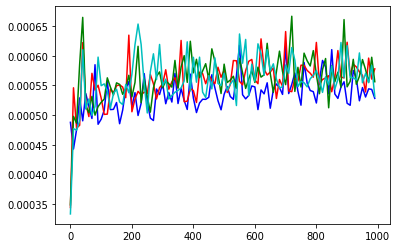

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


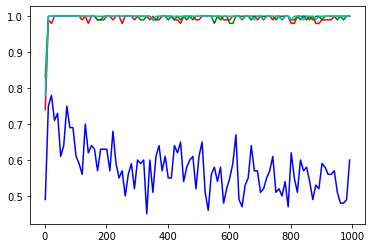

----------------- Grado 24 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


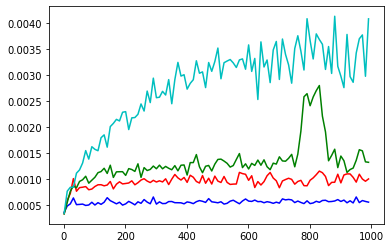

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


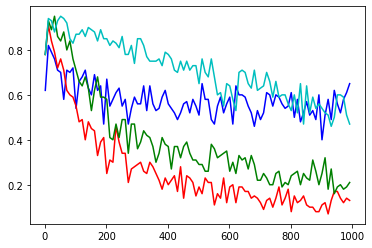

----------------- Grado 25 -----------------


Promedio de tiempo en encontrar raices por intervalo [-n,n]


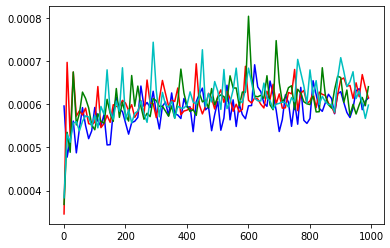

Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)


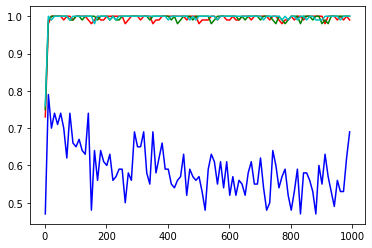

In [157]:
print("Testing - Polinomios aleatorios.\nVariacio'n de intervalos de bu'squeda.\n")
indexes = list(range(1,1001,10))

for k in range(2,26):
    print("----------------- Grado {} -----------------".format(k))
    # Azul
    # Rango de bu'squeda: [0,1] a [0,1000]
    # Max. 100 puntos aleatorios
    average_times = [generate_rand_p(poly_amount=100, 
                                    coefficient_range=100, 
                                    degree=k, 
                                    search_range_a=0, 
                                    search_range_b=x) for x in indexes]
    print("")

    # Rojo
    # Rango de busqueda: [-1,1] a [-1000,1000]
    # Max. 100 puntos aleatorios
    average_times2 = [generate_rand_p(poly_amount=100, 
                                      coefficient_range=100, 
                                      degree=k, 
                                      search_range_a=-1*x, 
                                      search_range_b=x) for x in indexes]
    print("")

    # Verde
    # Rango de busqueda: [-1,1] a [-1000,1000]
    # Max. 200 puntos aleatorios
    average_times3 = [generate_rand_p(poly_amount=100, 
                                      coefficient_range=100, 
                                      degree=k, 
                                      search_range_a=-1*x, 
                                      search_range_b=x, 
                                      max_random=200) for x in indexes]  

    # Cian
    # Rango de busqueda: [-1,1] a [-1000,1000]
    # Max. 1000 puntos aleatorios
    average_times4 = [generate_rand_p(poly_amount=100, 
                                      coefficient_range=100, 
                                      degree=k, 
                                      search_range_a=-1*x, 
                                      search_range_b=x, 
                                      max_random=1000) for x in indexes]                                 

    print("Promedio de tiempo en encontrar raices por intervalo [-n,n]")
    plt.plot(indexes, [i[0] for i in average_times], 'b')
    plt.plot(indexes, [i[0] for i in average_times2], 'r')
    plt.plot(indexes, [i[0] for i in average_times3], 'g')
    plt.plot(indexes, [i[0] for i in average_times4], 'c')
    plt.show()
    print("Medida de exito por grados (0 - ninguna raiz, 1 - una raiz para cada polinomio)")
    plt.plot(indexes,[i[1] for i in average_times], 'b')
    plt.plot(indexes, [i[1] for i in average_times2], 'r')
    plt.plot(indexes, [i[1] for i in average_times3], 'g')
    plt.plot(indexes, [i[1] for i in average_times4], 'c')
    plt.show()

Testing - Polinomios aleatorios.
Recursion limit: 14000 


Tiempo promedio en encontrar una raíz por grado (1000 corridas)


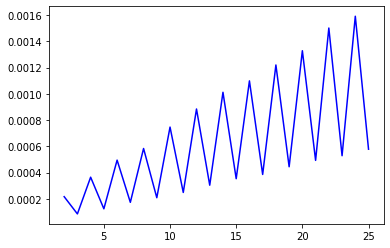

Medida de exito por grados (0 - ninguna raíz, 1 - todas las raíces)


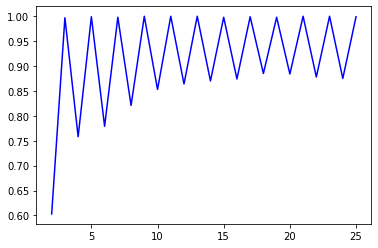

In [159]:
import sys
sys.setrecursionlimit(14000)
print("Testing - Polinomios aleatorios.\nRecursion limit:", sys.getrecursionlimit(),"\n")
indexes = list(range(2,26))

# Azul
# Rango de bu'squeda: [-100,100]
# Max. 1000 puntos aleatorios
average_times = [generate_rand_p(poly_amount=1000, 
                                 coefficient_range=100, 
                                 degree=x, 
                                 search_range_a=-100, 
                                 search_range_b=100,
                                 max_random=1000) for x in indexes]
print("")


print("Tiempo promedio en encontrar una raíz por grado (1000 corridas)")
plt.plot(indexes, [i[0] for i in average_times], 'b')
plt.show()
print("Medida de exito por grados (0 - ninguna raíz, 1 - todas las raíces)")
plt.plot(indexes,[i[1] for i in average_times], 'b')
plt.show()

Testing - Polinomios aleatorios.
Recursion limit: 14000 


Tiempo promedio en encontrar una raíz por grados impares (100 corridas)


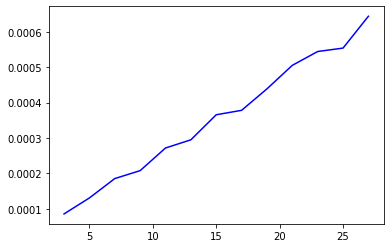

Medida de exito por grados (0 - ninguna raiz, 1 - todas las raices)


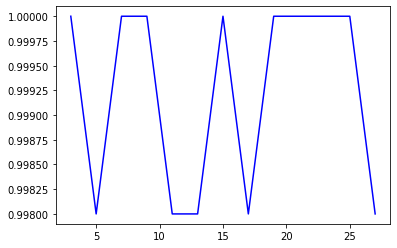

In [168]:
import sys
sys.setrecursionlimit(14000)
print("Testing - Polinomios aleatorios.\nRecursion limit:", sys.getrecursionlimit(),"\n")
indexes = list(range(3,28,2))

# Azul
# Rango de bu'squeda: [0,100]
# Max. 100 puntos aleatorios
average_times = [generate_rand_p(poly_amount=500, 
                                 coefficient_range=100, 
                                 degree=x, 
                                 search_range_a=-100, 
                                 search_range_b=100,
                                 max_random=1000) for x in indexes]
print("")


print("Tiempo promedio en encontrar una raíz por grados impares (100 corridas)")
plt.plot(indexes, [i[0] for i in average_times], 'b')
plt.show()
print("Medida de exito por grados (0 - ninguna raiz, 1 - todas las raices)")
plt.plot(indexes,[i[1] for i in average_times], 'b')
plt.show()

Testing - Polinomios aleatorios.
Recursion limit: 14000 


Tiempo promedio en encontrar una raíz por grado (1000 corridas)


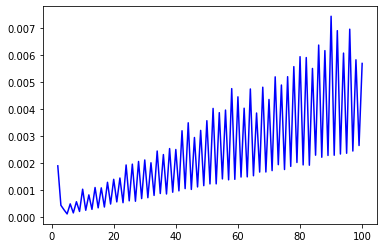

Medida de exito por grados (0 - ninguna raíz, 1 - todas las raíces)


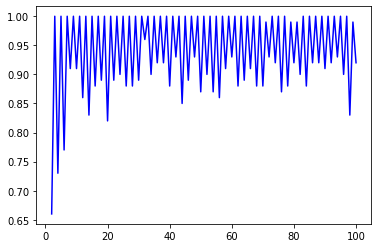

In [167]:
import sys
sys.setrecursionlimit(14000)
print("Testing - Polinomios aleatorios.\nRecursion limit:", sys.getrecursionlimit(),"\n")
indexes = list(range(2,101))

# Azul
# Rango de bu'squeda: [-100,100]
# Max. 1000 puntos aleatorios
average_times = [generate_rand_p(poly_amount=100, 
                                 coefficient_range=100, 
                                 degree=x, 
                                 search_range_a=-100, 
                                 search_range_b=100,
                                 max_random=1000) for x in indexes]
print("")


print("Tiempo promedio en encontrar una raíz por grado (1000 corridas)")
plt.plot(indexes, [i[0] for i in average_times], 'b')
plt.show()
print("Medida de exito por grados (0 - ninguna raíz, 1 - todas las raíces)")
plt.plot(indexes,[i[1] for i in average_times], 'b')
plt.show()

In [191]:
print("Problema puntual ver. 2.")
model_p = Polynomial([-1, 30, 15, 34, 540])
print(model_p)

start_time = time.time()

my_root = model_p.approximate_root(-100, 100, 100)    # O(n*log_2(m))

print("Raiz encontrada: ",my_root,"\nEl tiempo de ejecución fue:", time.time() - start_time, "ns")

Problema puntual ver. 2.
-1x^4 +30x^3 +15x^2 +34x^1 +540
Raiz encontrada:  -2.56811058647492 
El tiempo de ejecución fue: 0.00018835067749023438 ns
